# Para começar iremos importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importaremos a base de dados do Tempo em Londres

In [4]:
tempo = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')

### Ao ler a base de dados podemos verificar informações sobre temperatura máxima e mínima

In [5]:
tempo.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


### Aquestão observada e que os verões estão ficando mais quente a cada ano

In [6]:
july = tempo.query('Month == 7')
july.insert(0,'Yr',range(0,len(july))) # Criamos um novo dataset chamado july, uma vez que este é o mes ápice do verão

In [8]:
july.head()

,Yr,Year,Month,Tmax,Tmin,Rain,Sun
6,0,1957,7,22.5,13.8,87.0,152.3
18,1,1958,7,21.7,12.9,51.9,190.5
30,2,1959,7,24.7,13.3,86.5,276.9
42,3,1960,7,20.1,12.4,67.2,139.7
54,4,1961,7,22.1,12.1,26.2,180.0


### Nós podemos plotar as maximas na temperatura desde de July 1957

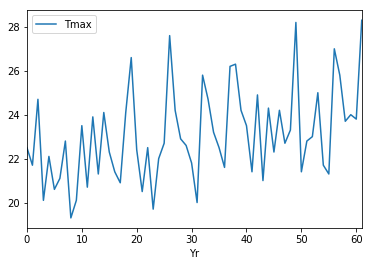

In [9]:
july.plot(y='Tmax',x='Yr')

##### ‎Podemos tentar tornar isso um pouco mais óbvio, fazendo uma regressão linear onde tentamos encontrar um ‎‎Direto‎‎ gráfico de linha que representa a tendência no ‎‎Ascensão‎‎ em temperatura. Para fazer isso usamos a função ‎‎de polifit‎‎ da Numpy. ‎‎Polyfit‎‎ faz um ajuste polinomial mínimo quadrado sobre os dados que é dado. Queremos uma regressão linear sobre os dados nas colunas ‎‎Yr‎‎ e ‎‎Tmax‎‎ para que os passemos como parâmetros. O parâmetro final é o grau do polinômial. Para regressão linear o grau é 1‎

In [10]:
d = np.polyfit(july['Yr'],july['Tmax'],1)
f = np.poly1d(d)

#### ‎Agora usamos a função ‎‎f‎‎ para produzir nossos dados de regressão linear e inserindo isso em uma nova coluna chamada ‎‎Treg‎

In [11]:
july.insert(6,'Treg',f(july['Yr']))

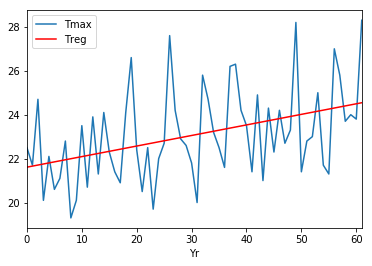

In [12]:
# Agora teremos uma linha 
ax = july.plot(x = 'Yr',y='Tmax')
july.plot(x='Yr', y='Treg',color='Red',ax=ax)

### vamos verificar de outra forma utilizando um scaterplot

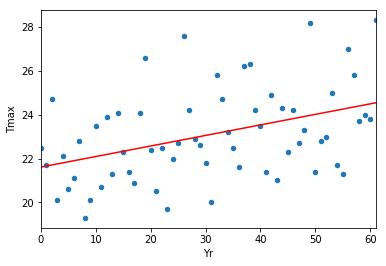

In [13]:
ax=july.plot.scatter(x='Yr', y='Tmax')
july.plot(x='Yr',y='Treg',color='Red',legend=False,ax=ax)